In [2]:
# Basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# import sklearn packages
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
#from sklearn.neural_network import MLPRegressor
from math import sqrt

# import visualization libraries
from IPython.display import Image  
import pydotplus
from sklearn.externals.six import StringIO

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# make the output stable across runs
np.random.seed(42)

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# read the data
Autism_raw = pd.read_csv('Autism_Adult_Data.csv')

In [4]:
# glimpse the data
print("Shape of Autism data:\nrows:", Autism_raw.shape[0], '\ncolumns:', Autism_raw.shape[1])

Shape of Autism data:
rows: 704 
columns: 20


In [5]:
Autism_raw.head().T

,0,1,2,3,4
A1_Score,1,1,1,1,1
A2_Score,1,1,1,1,0
A3_Score,1,0,0,0,0
A4_Score,1,1,1,1,0
A5_Score,0,0,1,0,0
A6_Score,0,0,0,0,0
A7_Score,1,0,1,1,0
A8_Score,1,1,1,1,1
A9_Score,0,0,1,0,0
A10_Score,0,1,1,1,0


In [6]:
Autism_raw.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
Age                46
Gender              2
Ethnicity          11
Jundice             2
Family              2
Country_of_res     67
Used_app_before     2
Age_desc            1
Relation            5
ASD                 2
dtype: int64

In [7]:
Autism_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
A1_Score           700 non-null float64
A2_Score           701 non-null float64
A3_Score           701 non-null float64
A4_Score           701 non-null float64
A5_Score           704 non-null int64
A6_Score           702 non-null float64
A7_Score           699 non-null float64
A8_Score           703 non-null float64
A9_Score           701 non-null float64
A10_Score          703 non-null float64
Age                698 non-null float64
Gender             701 non-null object
Ethnicity          604 non-null object
Jundice            700 non-null object
Family             699 non-null object
Country_of_res     700 non-null object
Used_app_before    701 non-null object
Age_desc           700 non-null object
Relation           607 non-null object
ASD                704 non-null object
dtypes: float64(10), int64(1), object(9)
memory usage: 110.1+ KB


In [8]:
# check missing data (There is no missing data in the entire dataset.)
total = Autism_raw.isnull().sum().sort_values(ascending = False)
percent = (Autism_raw.isnull().sum()/Autism_raw.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Ethnicity,100,14.204545
Relation,97,13.778409
Age,6,0.852273
Family,5,0.710227
A7_Score,5,0.710227
A1_Score,4,0.568182
Age_desc,4,0.568182
Country_of_res,4,0.568182
Jundice,4,0.568182
A4_Score,3,0.426136


In [9]:
# check data unbalance 
# explore the target variable: ASD
Asddata = Autism_raw.ASD.value_counts().sort_index()
Asddata_df = pd.DataFrame({'ASD': Asddata.index,'Count': Asddata.values})
Asddata_df
                           

,ASD,Count
0,NO,515
1,YES,189


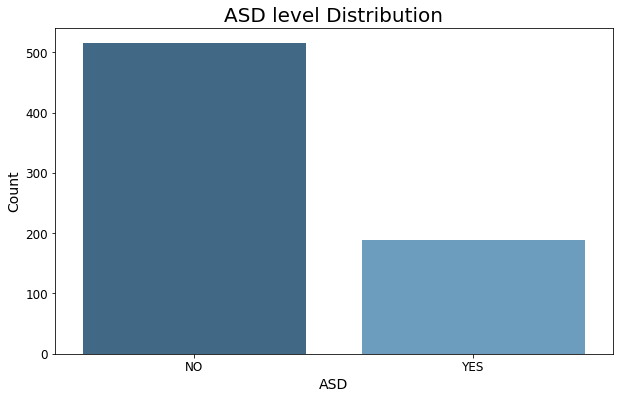

In [10]:
# visualize target variable
plt.figure(figsize=(10,6))
sns.barplot(x = 'ASD', y ="Count", data = Asddata_df,palette="Blues_d")
plt.title('ASD level Distribution',fontsize=20)
plt.show()

In [21]:
# drop missing rows for columns only has few missing values
Adf = Autism_raw.dropna(subset=['A8_Score',
                      'A10_Score','A6_Score', 'A3_Score','A2_Score','A9_Score','A4_Score','A1_Score','A7_Score',
                   'Gender','Used_app_before','Jundice','Country_of_res','Age_desc','Family','Age','Relation','Ethnicity'
                      ])

In [22]:
Adf.shape

(559, 20)

In [23]:
Adf.head().T

,0,1,2,3,5
A1_Score,1,1,1,1,1
A2_Score,1,1,1,1,1
A3_Score,1,0,0,0,1
A4_Score,1,1,1,1,1
A5_Score,0,0,1,0,1
A6_Score,0,0,0,0,0
A7_Score,1,0,1,1,1
A8_Score,1,1,1,1,1
A9_Score,0,0,1,0,1
A10_Score,0,1,1,1,1


## 2.Feature Encoding

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import copy
le = preprocessing.LabelEncoder()

In [25]:
#identifying from categorical variables
adf_cat = Adf.select_dtypes(include=[object])
adf_cat.head()

,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
5,m,Others,yes,no,'United States',no,'18 and more',Self,YES


In [26]:
# One hot encoding and Dummies to make categorical features numerical for analysis purposes
adf_catdf = pd.get_dummies(adf_cat)
adf_catdf.head()

,Gender_f,Gender_m,Ethnicity_'Middle Eastern ',Ethnicity_'South Asian',Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Others,Ethnicity_Pasifika,...,Used_app_before_no,Used_app_before_yes,Age_desc_'18 and more',Relation_'Health care professional',Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,ASD_NO,ASD_YES
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
5,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1


In [27]:
adf_numdf = Adf.select_dtypes(include=['float64','int64'])
adf_numdf.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0
5,1.0,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,1.0,36.0


In [28]:
# Combine the numerical and categorical features for total dataset represented numerically
all_adf_data = pd.concat([adf_numdf,adf_catdf],axis=1)
print(all_adf_data.shape)

(559, 96)


In [29]:
import copy
adf_num = copy.deepcopy(Adf)

In [30]:
# transform categorical columns value into numerical
adf_num['Gender'] = le.fit_transform(adf_num['Gender'])
adf_num['Ethnicity'] = le.fit_transform(adf_num['Ethnicity'])
adf_num['Jundice'] = le.fit_transform(adf_num['Jundice'])
adf_num['Family'] = le.fit_transform(adf_num['Family'])
adf_num['Country_of_res'] = le.fit_transform(adf_num['Country_of_res'])
adf_num['Used_app_before'] = le.fit_transform(adf_num['Used_app_before'])
adf_num['Age_desc'] = le.fit_transform(adf_num['Age_desc'])
adf_num['Relation'] = le.fit_transform(adf_num['Relation'])
adf_num['ASD'] = le.fit_transform(adf_num['ASD'])


In [31]:
adf_num.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,0,9,0,0,9,0,0,4,0
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,1,5,0,1,22,0,0,4,0
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,1,5,1,1,53,0,0,2,1
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,0,9,0,1,9,0,0,4,0
5,1.0,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,1.0,36.0,1,6,1,0,9,0,0,4,1


In [32]:
# set features & target
y = adf_num['ASD']
X = adf_num.drop('ASD', axis=1)
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,0,9,0,0,9,0,0,4
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,1,5,0,1,22,0,0,4
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,1,5,1,1,53,0,0,2
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,0,9,0,1,9,0,0,4
5,1.0,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,1.0,36.0,1,6,1,0,9,0,0,4


## Correlation Matrix

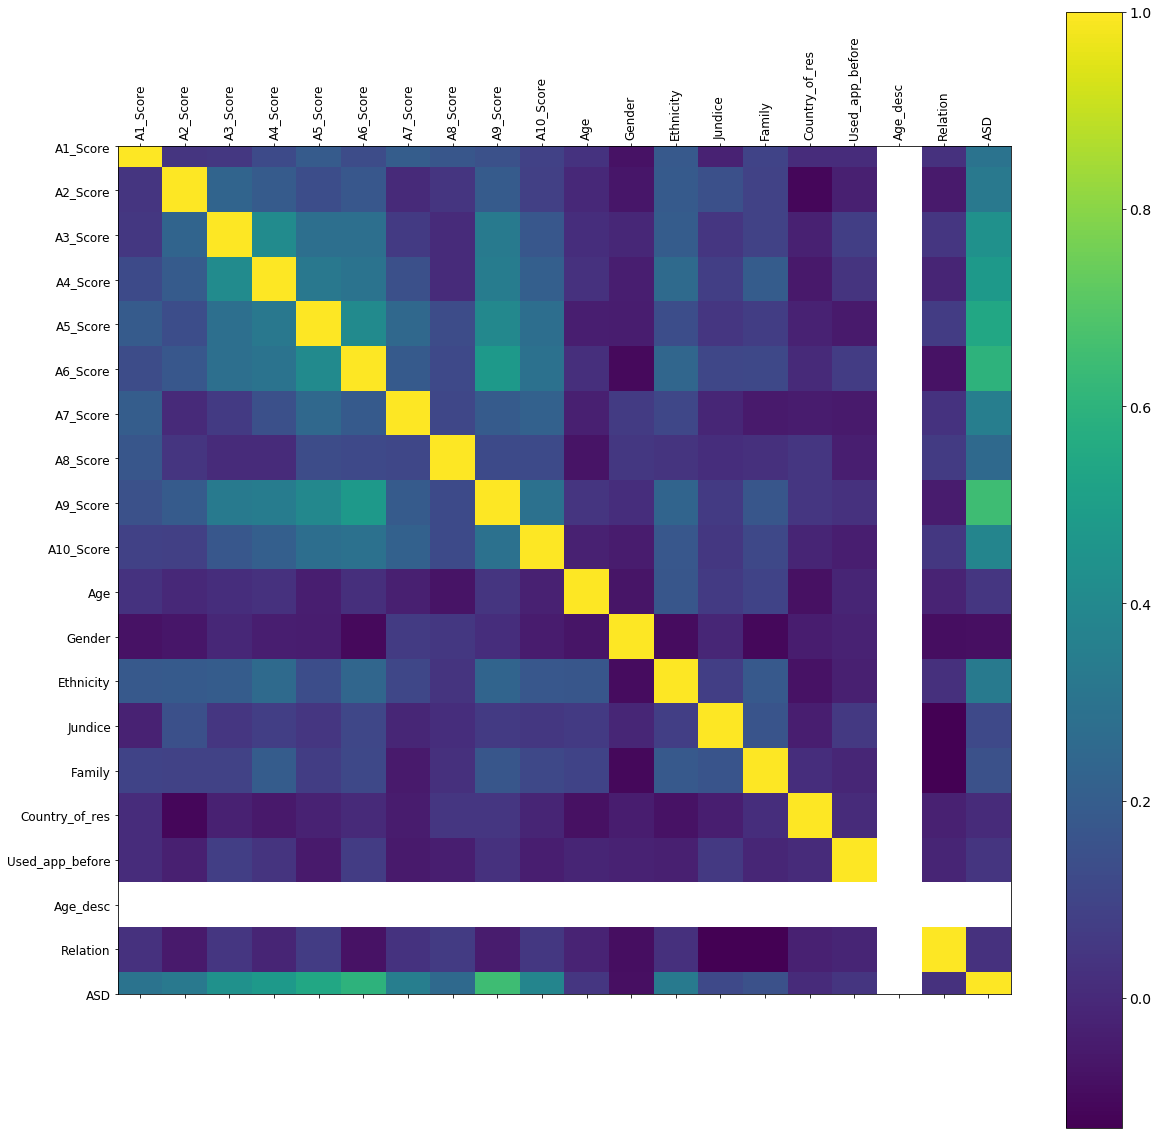

In [33]:
f = plt.figure(figsize=(20, 20))
plt.matshow(adf_num.corr(), fignum=f.number)
plt.xticks(range(adf_num.shape[1]), adf_num.columns, rotation=90)
plt.yticks(range(adf_num.shape[1]), adf_num.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

### Treatment of Imbalanced Data

In [34]:
# function: show single variable's distribution
# arguments: 
            # dataframe: dataframe
            # varName: column name (e.g.: 'ASD')
            # (optional) varName: name for the plot title
def var_dist(dataframe,variable, *args, **kwargs):
    count = dataframe[variable].value_counts()
    count_df = pd.DataFrame({variable: count.index,'Count': count.values})
    print(count_df.to_string(index=False))
    # plot the distribution
    plt.figure(figsize=(10,6))
    sns.barplot(x = variable, y ="Count", data = count_df)
    # fetch optional argument varName
    varName = kwargs.get('varName', None)
    if varName != None:
        plt.title(varName + ' Distribution',fontsize=20)
    else:
        plt.title(variable + ' Distribution',fontsize=20)   
    plt.show()

 ASD  Count
   0    394
   1    165


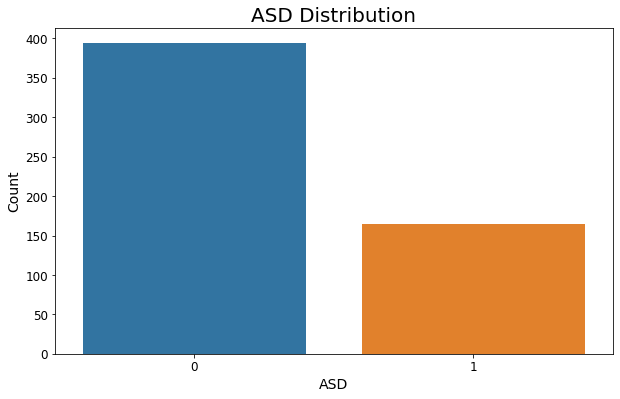

In [35]:
var_dist(adf_num,'ASD')


In [36]:
adf_num.shape

(559, 20)

### Upsampling

In [37]:
#Upsampling is a technique used to match the number of minority class to the majority class.

#The key of upsampling is to only upsample the training set but not the test set.

In [38]:
# Split dataset into training set & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [39]:
# concatenate training data
adf_train = pd.concat([X_train, y_train], axis=1)

In [40]:
# separate ASD0 & ASD1
asd0 = adf_train[adf_train['ASD']==0]
asd1 = adf_train[adf_train['ASD']==1]

In [41]:
asd0.shape


(316, 20)

In [42]:
asd1.shape

(131, 20)

In [43]:
# upsample ASD1
from sklearn.utils import resample
asd1_resampled = resample(asd1,
                            replace=True,
                            n_samples=len(asd0),
                            random_state=42)

In [44]:
adf_train_up = pd.concat([asd0, asd1_resampled])

 ASD  Count
   1    316
   0    316


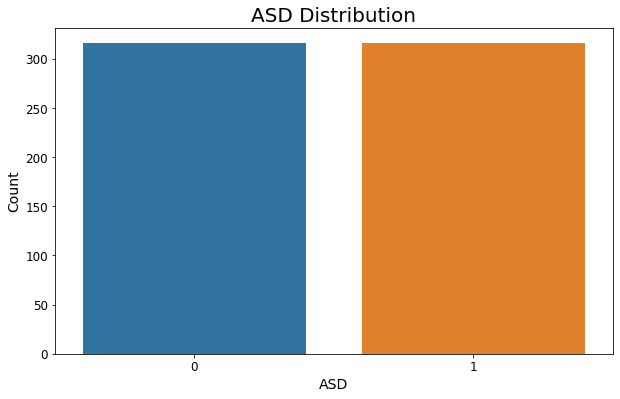

In [45]:
var_dist(adf_train_up,'ASD')

#### Get Feature Names

In [46]:
features_name = list(X.columns.values)
target_name = ['not ASD','ASD']
features_name,target_name

(['A1_Score',
  'A2_Score',
  'A3_Score',
  'A4_Score',
  'A5_Score',
  'A6_Score',
  'A7_Score',
  'A8_Score',
  'A9_Score',
  'A10_Score',
  'Age',
  'Gender',
  'Ethnicity',
  'Jundice',
  'Family',
  'Country_of_res',
  'Used_app_before',
  'Age_desc',
  'Relation'],
 ['not ASD', 'ASD'])

## Decision Tree (upsampled data)

In [47]:
y_train = adf_train_up['ASD']
X_train = adf_train_up.drop('ASD', axis=1)

In [48]:
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation
512,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,18.0,0,2,0,0,10,0,0,4
551,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,42.0,0,9,0,1,16,0,0,4
526,0.0,0.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,32.0,1,2,0,0,7,0,0,4
262,1.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,26.0,1,2,0,0,34,0,0,4
63,1.0,0.0,0.0,1.0,1,0.0,0.0,1.0,1.0,0.0,19.0,1,9,0,0,16,0,0,2


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
clf_dt = DecisionTreeClassifier(random_state = 42,
                                 max_depth=10, 
                                 max_features=10, 
                                 max_leaf_nodes=30,
                                 min_samples_leaf=5,
                                 min_samples_split=7
                                ) # accuracy

clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [51]:
import copy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from IPython.display import Markdown, display

In [52]:
# name: get_results()
# function: show model results, eg. accuracy, precision, recall, f1-score, roc_auc
# arguments: 
            # clf: classifier
            # clf_name: classifier's name (e.g.: 'Decision Tree')

def get_results(clf,clf_name,x_train,y_train,x_test,y_test):
    y_pred = clf.predict(x_test)
    
    
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_test, clf.predict(x_test))))
    
    print(classification_report(y_test, y_pred))
    
    probs = clf.predict_proba(x_test) # Predict class probabilities of the input samples 
    preds = probs[:,1]
    fpr,tpr,threshold = roc_curve(y_test, preds) 
    roc_auc = auc(fpr,tpr)
    print('ROC AUC Score('+clf_name+'): {:2.2%}'.format(roc_auc))
    
   
    
    cv_accuracy = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    cv_recall = cross_val_score(clf, x_train, y_train, cv=5, scoring='recall')
    print('Recall: {:2.2%}'.format(np.mean(cv_recall)))
    cv_precision = cross_val_score(clf, x_train, y_train, cv=5, scoring='precision')
    print('Precision: {:2.2%}'.format(np.mean(cv_precision)))
    cv_f1 = cross_val_score(clf, x_train, y_train, cv=5, scoring='f1')
    print('F1-score: {:2.2%}'.format(np.mean(cv_f1)))
    cv_roc_auc = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
    print('ROC AUC Score: {:2.2%}'.format(np.mean(cv_roc_auc)))
    
    
   
#     accuracy = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
#     print('Accuracy\n',np.mean(accuracy),accuracy)
#     recall = cross_val_score(clf, x_train, y_train, cv=5, scoring='recall')
#     print('Recall\n', np.mean(recall), recall)
#     precision = cross_val_score(clf, x_train, y_train, cv=5, scoring='precision')
#     print('Precision\n', np.mean(precision), precision)
#     f1 = cross_val_score(clf, x_train, y_train, cv=5, scoring='f1')
#     print('F1\n', np.mean(f1), f1)
#     roc_auc = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
#     print('ROC AUC Score\n', np.mean(roc_auc), roc_auc)
#     print('Confusion matrix:\n', cm)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)
    
    # calculate the Optimum Threshold
    for i in range(len(fpr)):
        if fpr[i] + tpr[i] >= 1:
            i = i -1
            break
    plt.show()
    
    
    plt.plot(fpr, tpr, lw=1,label='ROC Curve(area = %0.3f)    Optimum Threshold = %0.3f' % (roc_auc, threshold[i]))
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ('+clf_name+')',fontsize=16)
    plt.legend(loc="lower right")
    plt.show()


Training Accuracy(Decision Tree - Upsampled): 96.99%
Test Accuracy(Decision Tree - Upsampled): 88.39%
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        78
           1       0.82      0.79      0.81        34

    accuracy                           0.88       112
   macro avg       0.86      0.86      0.86       112
weighted avg       0.88      0.88      0.88       112

ROC AUC Score(Decision Tree - Upsampled): 88.14%
Accuracy: 91.13%
Recall: 90.80%
Precision: 91.42%
F1-score: 90.89%
ROC AUC Score: 96.06%


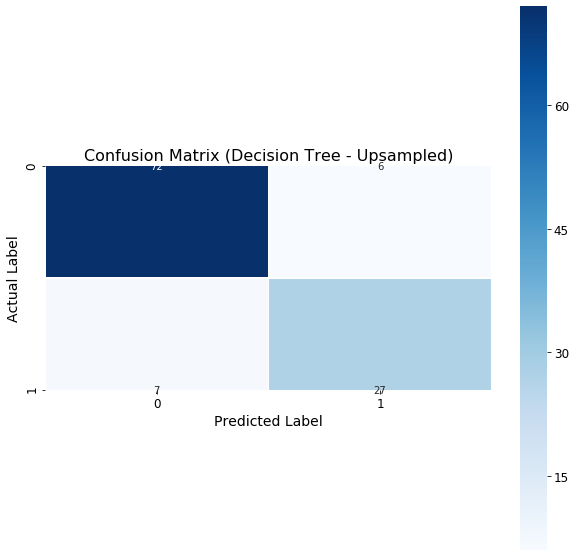

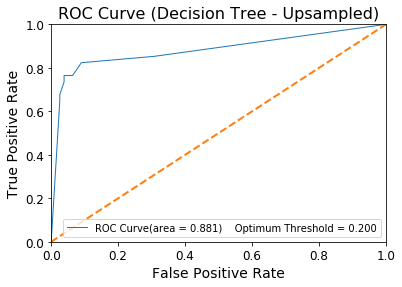

In [53]:
adf_result = get_results(clf_dt,'Decision Tree - Upsampled',X_train,y_train,X_test,y_test)

In [54]:
# Test the accuracy
prediction = clf_dt.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, prediction))

Decision Tree Accuracy: 0.8839285714285714


In [84]:
# Cross Validation - Decision Tree Binary
cv_clf = clf_dt
cv_X_test = X_test
cv_y_test = y_test
cv_folds = 3
cv_scoring = None 
cv_scoring1 = 'roc_auc'
cv_result = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring)
cv_result1 = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring1)
print(cv_result)
print(cv_result1)
print('Plain: Mean %.5f, Std %.5f' % (np.mean(cv_result),np.std(cv_result)))


[0.84210526 0.78378378 0.78378378]
[0.92307692 0.78671329 0.82517483]
Plain: Mean 0.80322, Std 0.02749


## Feature Importance

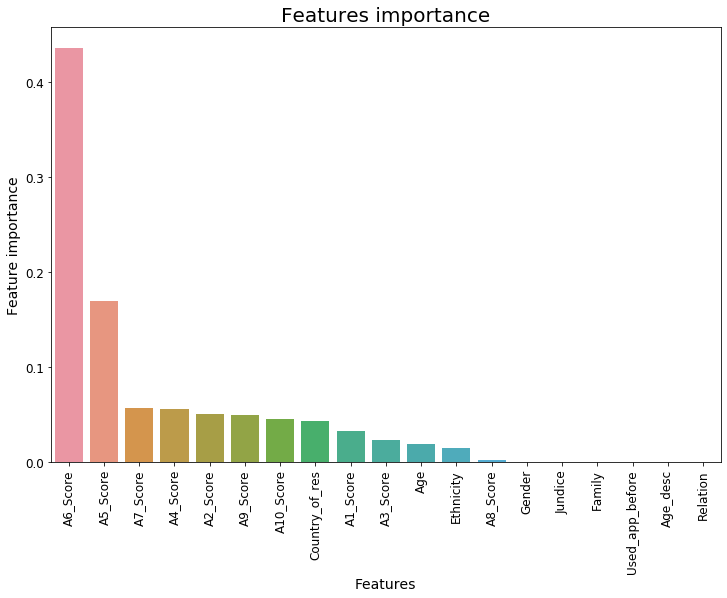

In [56]:
tmp = pd.DataFrame({'Features': features_name, 'Feature importance': clf_dt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=20)
s = sns.barplot(x='Features',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

## Decision Tree (imbalanced data)

In [57]:
# set features & target
y2 = adf_num['ASD']
X2 = adf_num.drop('ASD', axis=1)

In [58]:
# split into training & test set (80%/20%)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [59]:
clf_dt2 = DecisionTreeClassifier(random_state = 42,
                                 max_depth=10, 
                                 max_features=10, 
                                 max_leaf_nodes=30,
                                 min_samples_leaf=5,
                                 min_samples_split=7,
                                 class_weight='balanced'
                                ) # accuracy

clf_dt2.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Training Accuracy(Decision Tree2): 94.18%
Test Accuracy(Decision Tree2): 89.29%
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        84
           1       0.77      0.82      0.79        28

    accuracy                           0.89       112
   macro avg       0.85      0.87      0.86       112
weighted avg       0.90      0.89      0.89       112

ROC AUC Score(Decision Tree2): 89.56%
Accuracy: 88.14%
Recall: 88.99%
Precision: 76.38%
F1-score: 82.12%
ROC AUC Score: 94.02%


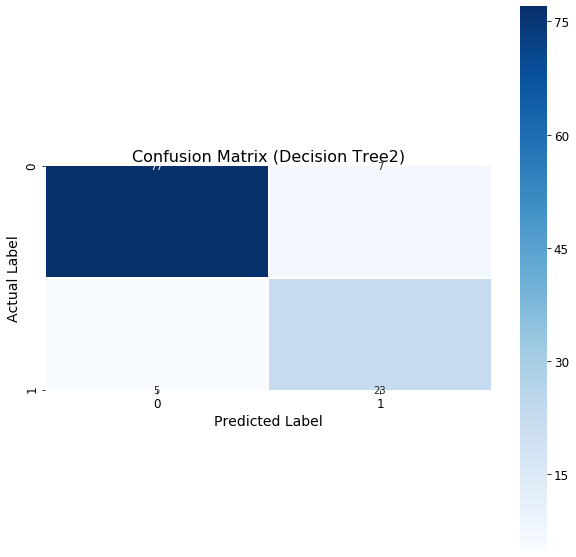

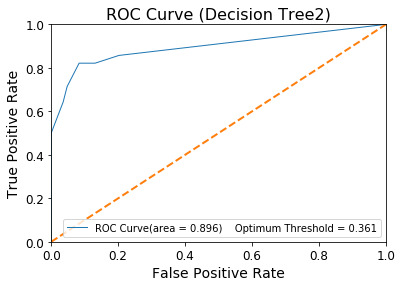

In [60]:
clf_dt2_results = get_results(clf_dt2,'Decision Tree2',X2_train,y2_train,X2_test,y2_test)

Confusion matrix:
 [[77  7]
 [ 5 23]]


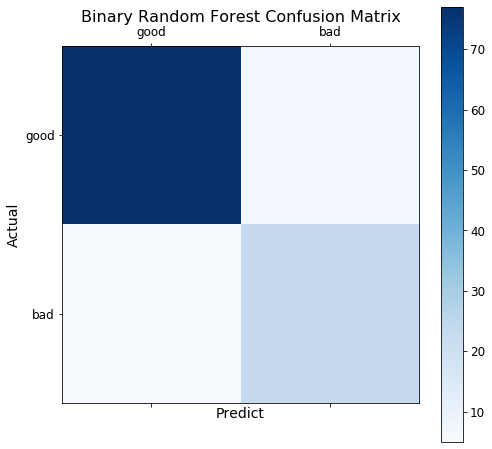

In [62]:
conf_mat = confusion_matrix(y2_test, clf_dt2.predict(X2_test)) 
print('Confusion matrix:\n', conf_mat) 
labels = ['good', 'bad'] 
fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues) 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.title('Binary Random Forest Confusion Matrix',fontsize=16) 
plt.xlabel('Predict') 
plt.ylabel('Actual') 
plt.show() 

In [63]:
# Test the accuracy
prediction = clf_dt2.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, prediction))

Decision Tree Accuracy: 0.8928571428571429


In [65]:
# Cross Validation - Decision Tree Binary
cv_clf = clf_dt2
cv_X_test = X2_test
cv_y_test = y2_test
cv_folds = 3
cv_scoring = None 
cv_scoring1 = 'roc_auc'
cv_result = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring)
cv_result1 = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring1)
print(cv_result)
print(cv_result1)
print('Plain: Mean %.5f, Std %.5f' % (np.mean(cv_result),np.std(cv_result)))

[0.89473684 0.86486486 0.75675676]
[0.85178571 0.89880952 0.86904762]
Plain: Mean 0.83879, Std 0.05927


## Optimisation

In [66]:
# Grid Search for Decision Tree Multi-classification
classifier = DecisionTreeClassifier(random_state = 42)
parameters = {
              'max_depth': range(3,10),
              'max_features': range(3,10),
              'max_leaf_nodes':[5,10,20,100,200],
             }
scoring_fnc = make_scorer(accuracy_score)
kfold = KFold(n_splits=10)

grid = GridSearchCV(classifier, parameters, scoring_fnc, cv=kfold)
grid = grid.fit(X_train, y_train)

clf = grid.best_estimator_

print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, clf.get_params()[key]))

print('test score: %f'%clf.score(X_test, y_test))

pd.DataFrame(grid.cv_results_).T

best score: 0.949554
best parameters:
max_depth: 9
max_features: 3
max_leaf_nodes: 100
test score: 0.901786


,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
mean_fit_time,0.0024967,0.00204418,0.00294938,0.00215225,0.00181932,0.00189042,0.00178418,0.00183887,0.00183575,0.00182793,...,0.00201166,0.00195122,0.00199542,0.00207224,0.00204544,0.00210669,0.00196512,0.00198131,0.0020422,0.00202692
std_fit_time,0.000697541,7.47829e-05,0.00106022,0.000659407,0.00014139,0.000142187,1.47993e-05,0.000141754,0.000151624,7.38e-05,...,0.000235763,3.3625e-05,6.13302e-05,7.89613e-05,4.11725e-05,0.000195341,6.13713e-05,2.29053e-05,3.87797e-05,2.55685e-05
mean_score_time,0.000986338,0.000928426,0.00154333,0.000822568,0.000853682,0.000818467,0.000787687,0.000786567,0.000784945,0.000791955,...,0.00081799,0.000808406,0.000811768,0.000807309,0.000802541,0.000863671,0.000805879,0.000802279,0.000805688,0.000800753
std_score_time,0.000176387,0.000166316,0.000967202,6.41607e-05,0.000228276,6.73771e-05,2.06347e-05,9.84207e-06,1.00973e-05,2.20882e-05,...,3.35663e-05,1.49331e-05,3.69748e-05,1.33034e-05,6.18277e-06,6.06766e-05,1.73982e-05,1.45146e-05,5.5085e-06,8.01966e-06
param_max_depth,3,3,3,3,3,3,3,3,3,3,...,9,9,9,9,9,9,9,9,9,9
param_max_features,3,3,3,3,3,4,4,4,4,4,...,8,8,8,8,8,9,9,9,9,9
param_max_leaf_nodes,5,10,20,100,200,5,10,20,100,200,...,5,10,20,100,200,5,10,20,100,200
params,"{'max_depth': 3, 'max_features': 3, 'max_leaf_...","{'max_depth': 3, 'max_features': 3, 'max_leaf_...","{'max_depth': 3, 'max_features': 3, 'max_leaf_...","{'max_depth': 3, 'max_features': 3, 'max_leaf_...","{'max_depth': 3, 'max_features': 3, 'max_leaf_...","{'max_depth': 3, 'max_features': 4, 'max_leaf_...","{'max_depth': 3, 'max_features': 4, 'max_leaf_...","{'max_depth': 3, 'max_features': 4, 'max_leaf_...","{'max_depth': 3, 'max_features': 4, 'max_leaf_...","{'max_depth': 3, 'max_features': 4, 'max_leaf_...",...,"{'max_depth': 9, 'max_features': 8, 'max_leaf_...","{'max_depth': 9, 'max_features': 8, 'max_leaf_...","{'max_depth': 9, 'max_features': 8, 'max_leaf_...","{'max_depth': 9, 'max_features': 8, 'max_leaf_...","{'max_depth': 9, 'max_features': 8, 'max_leaf_...","{'max_depth': 9, 'max_features': 9, 'max_leaf_...","{'max_depth': 9, 'max_features': 9, 'max_leaf_...","{'max_depth': 9, 'max_features': 9, 'max_leaf_...","{'max_depth': 9, 'max_features': 9, 'max_leaf_...","{'max_depth': 9, 'max_features': 9, 'max_leaf_..."
split0_test_score,0.421875,0.421875,0.421875,0.421875,0.421875,0.84375,0.84375,0.84375,0.84375,0.84375,...,0.75,0.875,0.859375,0.890625,0.890625,0.875,0.875,0.875,0.90625,0.90625
split1_test_score,0.4375,0.421875,0.421875,0.421875,0.421875,0.875,0.875,0.875,0.875,0.875,...,0.796875,0.875,0.9375,0.921875,0.921875,0.9375,0.90625,0.96875,0.96875,0.96875


# 2. Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier


In [67]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
print(" Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

 Random Forest Accuracy: 0.9642857142857143


In [50]:
# cross validation Score -  Random Forest
cv_clf = rf_clf
cv_X_test = X_test
cv_y_test = y_test
cv_folds = 5
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring)
print('cross validation - Random Forest ')
print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))

cross validation - Random Forest 
[1.         0.91304348 0.95454545 0.86363636 0.95454545]
Mean: 0.93715, Std: 0.04591


Confusion matrix:
 [[76  2]
 [ 2 32]]


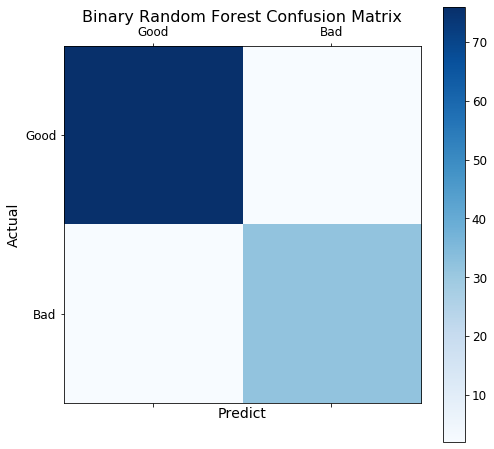

In [83]:
conf_mat = confusion_matrix(y_test, rf_clf.predict(X_test))
print('Confusion matrix:\n', conf_mat) 
labels = ['Good', 'Bad'] 
fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues) 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.title('Binary Random Forest Confusion Matrix',fontsize=16) 
plt.xlabel('Predict') 
plt.ylabel('Actual') 
plt.show() 

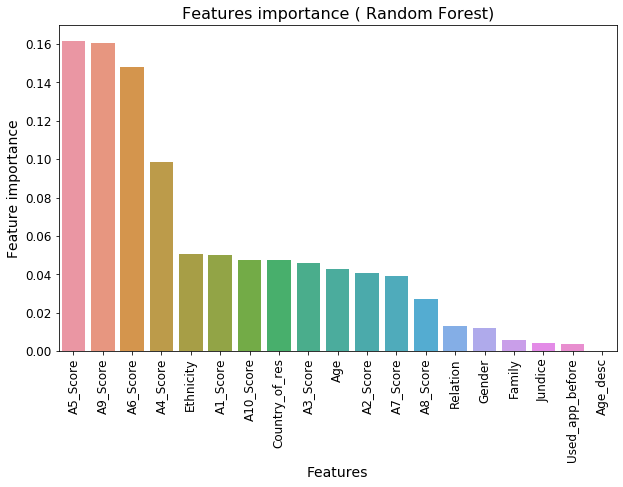

In [52]:
#calculation of importance of features 
tmp = pd.DataFrame({'Features': features_name, 'Feature importance': rf_clf.feature_importances_}) 
tmp = tmp.sort_values(by='Feature importance',ascending=False) 
plt.figure(figsize = (10,6)) 
plt.title('Features importance ( Random Forest)',fontsize=16) 
s = sns.barplot(x='Features',y='Feature importance',data=tmp) 
s.set_xticklabels(s.get_xticklabels(),rotation=90) 
plt.show()